In [4]:
from model import *
from data import *

In [5]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'datasets/data3/train','image','label',data_gen_args,save_to_dir = 'datasets/data3/train/aug',
                        target_size = (256,256),image_color_mode = 'rgb')
model = unetNorm(input_size = (256,256,3))
model_checkpoint = ModelCheckpoint('models/unet_lung1_data3.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=20,callbacks=[model_checkpoint])

Epoch 1/20
Found 306 images belonging to 1 classes.
Found 306 images belonging to 1 classes.
200/200 [==============================] - 1508s 8s/step - loss: 0.6882 - acc: 0.5972

Epoch 00001: loss improved from inf to 0.68821, saving model to unet_lung1_data3.hdf5
Epoch 2/20
200/200 [==============================] - 1496s 7s/step - loss: 0.6577 - acc: 0.7532

Epoch 00002: loss improved from 0.68821 to 0.65773, saving model to unet_lung1_data3.hdf5
Epoch 3/20
200/200 [==============================] - 1504s 8s/step - loss: 0.6269 - acc: 0.8704

Epoch 00003: loss improved from 0.65773 to 0.62689, saving model to unet_lung1_data3.hdf5
Epoch 4/20
200/200 [==============================] - 1500s 7s/step - loss: 0.6023 - acc: 0.9172

Epoch 00004: loss improved from 0.62689 to 0.60225, saving model to unet_lung1_data3.hdf5
Epoch 5/20
200/200 [==============================] - 1499s 7s/step - loss: 0.5771 - acc: 0.9429

Epoch 00005: loss improved from 0.60225 to 0.57715, saving model to unet

In [6]:
testGene = testGenerator("datasets/data3/test/image",target_size = (256,256),as_gray = False,
                        flag_multi_class = True)
model = unetNorm(input_size = (256,256,3))
model.load_weights("models/unet_lung1_data3.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
#we seem to need a renormalization? hopefully when fully trained we will not.
#augResults = np.array([(x-np.min(x))/(np.max(x)-np.min(x)) for x in results])
saveResult("datasets/data3/test/label",results)

/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


30/30 [==============================] - 35s 1s/step


/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data3/test/label/14_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data3/test/label/24_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nbuser/.anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: data3/test/label/25_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)


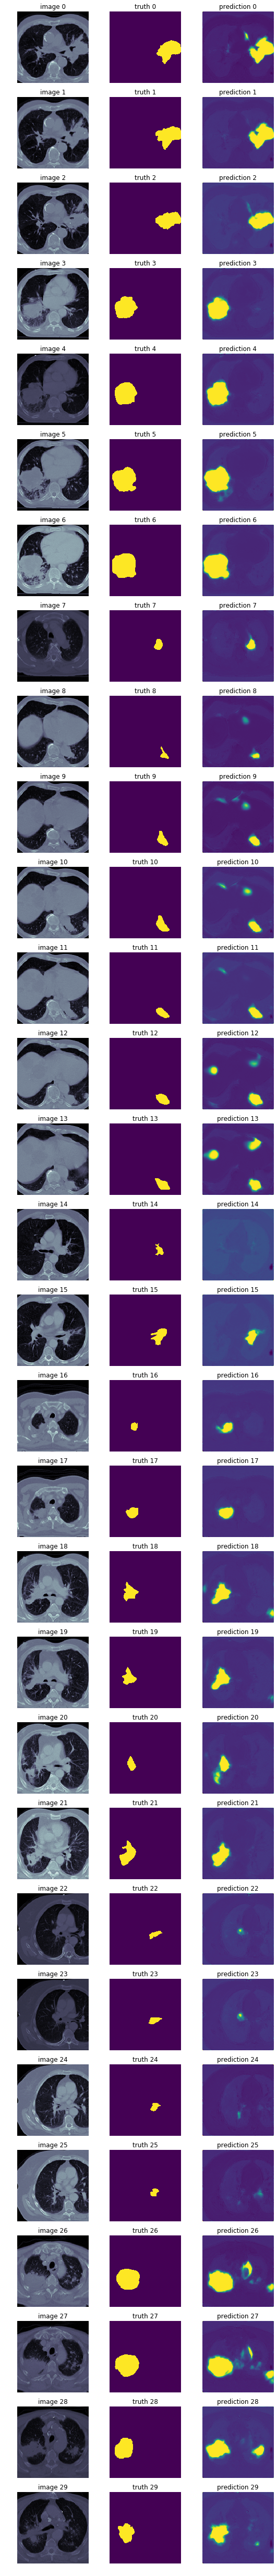

In [7]:
plotResults("data3/test/image/","data3/test/label/","data3/test/label/")

In [6]:

augResults = np.array([(x-np.min(x))/(np.max(x)-np.min(x)) for x in results])
augResults.shape

(30, 256, 256, 1)